### `Import the main Libraries`

In [1]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Other
import os, joblib

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, PolynomialFeatures

## sklearn -- metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
## sklearn -- Models
from sklearn.ensemble import RandomForestClassifier

## Xgboost
from xgboost import XGBClassifier
#light gpm
from lightgbm import LGBMClassifier


### Data Collection and Processing

In [2]:
## Read the CSV file using pandas
FILE_PATH = os.path.join(os.getcwd(), 'diabetes.csv')
diabetes = pd.read_csv(FILE_PATH)


## Show the Head of the DF
diabetes.head()

,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
0,80,Female,25,0,140,6.6,0,0
1,54,Female,27,0,80,6.6,0,0
2,28,Male,27,0,158,5.7,0,0
3,36,Female,23,0,155,5.0,1,0
4,76,Male,20,1,155,4.8,1,0


In [3]:
diabetes.tail()

,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
88375,17,Female,15,0,100,5.7,1,1
88376,22,Male,19,0,120,6.4,1,1
88377,27,Female,24,1,140,7.1,1,1
88378,32,Male,29,1,160,7.8,1,1
88379,37,Female,34,1,180,8.5,1,1


In [4]:
diabetes.shape

(88380, 8)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88380 entries, 0 to 88379
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          88380 non-null  int64  
 1   Gender       88380 non-null  object 
 2   BMI          88380 non-null  int64  
 3   High_BP      88380 non-null  int64  
 4   FBS          88380 non-null  int64  
 5   HbA1c_level  88380 non-null  float64
 6   Smoking      88380 non-null  int64  
 7   Diagnosis    88380 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 5.4+ MB


In [6]:
diabetes.describe()

,Age,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
count,88380.000000,88380.000000,88380.000000,88380.000000,88380.000000,88380.000000,88380.000000
mean,42.124010,27.073999,0.084205,138.662197,5.546687,0.313419,0.095316
std,22.281225,6.923608,0.277696,41.378602,1.085351,0.463886,0.293652
min,0.000000,10.000000,0.000000,80.000000,3.500000,0.000000,0.000000
25%,24.000000,23.000000,0.000000,100.000000,4.800000,0.000000,0.000000
50%,43.000000,27.000000,0.000000,140.000000,5.800000,0.000000,0.000000
75%,60.000000,30.000000,0.000000,159.000000,6.200000,1.000000,0.000000
max,80.000000,95.000000,1.000000,300.000000,12.000000,1.000000,1.000000


In [7]:
# checking the distribution of Target Variable
diabetes['Diagnosis'].value_counts()

Diagnosis
0    79956
1     8424
Name: count, dtype: int64

1 --> Defective diabetes

0 --> Healthy diabetes

### Handling Missing Data & Duplicates

In [8]:
diabetes.drop_duplicates(inplace=True)

In [10]:
diabetes.shape

(88378, 8)

In [11]:
diabetes.isnull().sum()

Age            0
Gender         0
BMI            0
High_BP        0
FBS            0
HbA1c_level    0
Smoking        0
Diagnosis      0
dtype: int64

### **EDA**

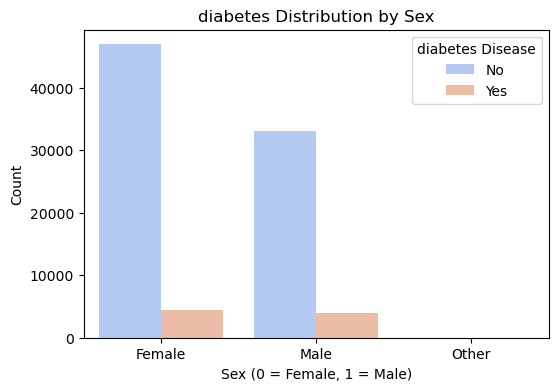

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Diagnosis", data=diabetes, palette="coolwarm")
plt.title("diabetes Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="diabetes Disease", labels=["No", "Yes"])
plt.show()

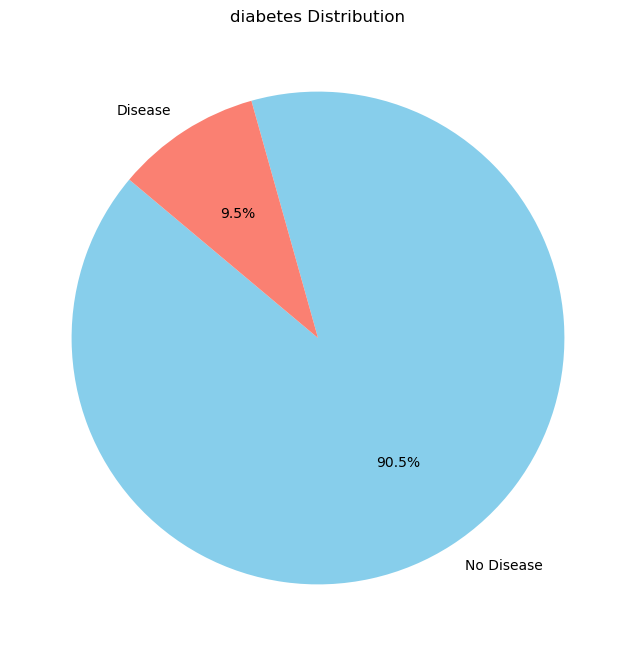

In [13]:
target_counts = diabetes["Diagnosis"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["No Disease", "Disease"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("diabetes Distribution")
plt.show() 

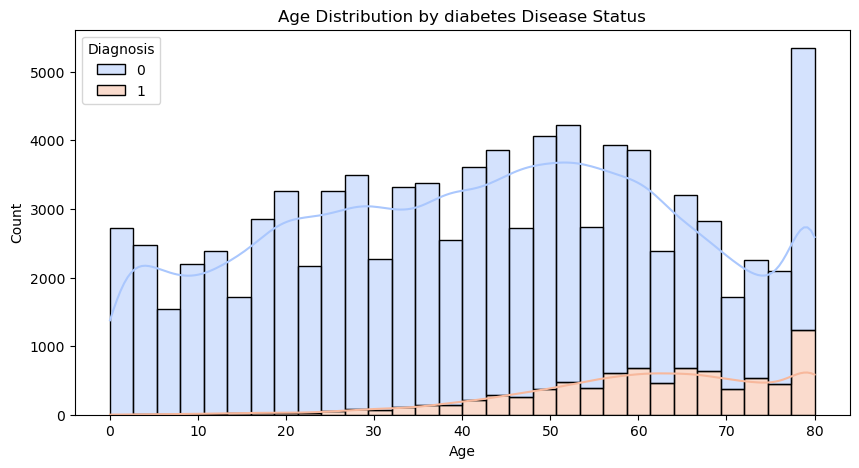

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=diabetes, x="Age", hue="Diagnosis", multiple="stack", bins=30, palette="coolwarm", kde=True)
plt.title("Age Distribution by diabetes Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### ### `Split the Dataset`


In [15]:
## Split the whole Dataset to Feature & Target
X = diabetes.drop(columns=['Diagnosis'], axis=1)   ## Features
y = diabetes['Diagnosis']   ## target


In [16]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42) 
## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (70702, 7)
y_train shape --  (70702,)
X_test shape --  (17676, 7)
y_test shape --  (17676,)


In [17]:
# Separete the columns according to type (numerical or categorical)

num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]#numarical
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]#categorical


print('Numerical Columns : \n', num_cols)
print('**'*40)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['Age', 'BMI', 'High_BP', 'FBS', 'HbA1c_level', 'Smoking']
********************************************************************************
Categorical Columns : 
 ['Gender']


In [18]:

num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', RobustScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

## concatenate both two pipelines
#FeatureUnion to union num and categ and it takes transformer_list which takes list of tuples
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train) 
X_test_final = total_pipeline.transform(X_test) 

In [19]:
X_train_final.shape , X_test_final.shape


((70702, 9), (17676, 9))

In [20]:
y_train.shape , y_test.shape

((70702,), (17676,))

### `Building ML Models`


### ` RandomForest`

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1) 
forest_clf.fit(X_train_final , y_train)  ## train

RandomForestClassifier(max_depth=6, max_samples=0.8, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [22]:

# Cross-validated accuracy scores
accuracy_scores = cross_val_score(forest_clf, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(forest_clf, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(forest_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.9694 0.9682 0.9681 0.9677 0.9676]
Mean Accuracy: 0.9682
CV F1 Scores: [0.9668 0.9654 0.9652 0.9647 0.9646]
Mean F1: 0.9653
Final Accuracy: 0.9682
Confusion Matrix:
[[63954    23]
 [ 2226  4499]]


### ` XGboost`

In [23]:
## Using the Hero API -- XGBOOST
xgb_clf = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_clf.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [24]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(xgb_clf, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(xgb_clf, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(xgb_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.9691 0.9683 0.9681 0.967  0.9682]
Mean Accuracy: 0.9681
CV F1 Scores: [0.9667 0.9657 0.9654 0.9643 0.9655]
Mean F1: 0.9655
Final Accuracy: 0.9681
Confusion Matrix:
[[63877   100]
 [ 2152  4573]]


### `LGBM`

In [26]:
lgbm_clf = LGBMClassifier( n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8,random_state=42)

In [27]:
lgbm_clf.fit(X_train_final, y_train)

[LightGBM] [Info] Number of positive: 6725, number of negative: 63977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 70702, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.095118 -> initscore=-2.252692
[LightGBM] [Info] Start training from score -2.252692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(max_depth=6, random_state=42, subsample=0.8)

In [28]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(lgbm_clf, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(lgbm_clf, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(lgbm_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.9693 0.9683 0.9683 0.9668 0.9678]
Mean Accuracy: 0.9681
CV F1 Scores: [0.9668 0.9657 0.9656 0.964  0.965 ]
Mean F1: 0.9654
Final Accuracy: 0.9681
Confusion Matrix:
[[63899    78]
 [ 2176  4549]]


In [29]:
joblib.dump(lgbm_clf, 'diabetes_disease_model.sav.pkl')

['diabetes_disease_model.sav.pkl']

In [30]:
loaded_model = joblib.load('diabetes_disease_model.sav.pkl')
loaded_model

LGBMClassifier(max_depth=6, random_state=42, subsample=0.8)

### `Inference on Test Dataset`

In [32]:
y_pred_test = loaded_model.predict(X_test_final) 

## accuraccy on test after finishing all my work
accuracy_test = np.sqrt(accuracy_score(y_test, y_pred_test)) 
print(f'accuracy on test Dataset using lgbm -- {accuracy_test:.3f}') 

accuracy on test Dataset using lgbm -- 0.984


c:\Users\Alzahraa\anaconda3\envs\gp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
